# Modeling an autoregressive process

## Defining the autoregressive process

#### An autoregressive process establishes that the output variable depends linearly on its own previous values. In other words, it is a regression of the variable against itself.

#### An autoregressive process is denoted as an AR(p) process, where p is the order. In such a process, the present value yt is a linear combination of a constant C, the present error term ϵt, which is also white noise, and the past values of the series yt–p. The magnitude of the influence of the past values on the present value is denoted as ϕp, which represents the coefficients of the AR(p)) model. Mathematically, we express a general AR(p) model with equation 5.1.

- yt = C + ϕ1yt–1 + ϕ2yt–2 +⋅⋅⋅ ϕpyt–p + ϵt

## Autoregressive process

#### An autoregressive process is a regression of a variable against itself. In a time series, this means that the present value is linearly dependent on its past values.

In [1]:
import pandas as pd

df = pd.read_csv("/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/Data/foot_traffic.csv")
df

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695
...,...
995,706.009031
996,705.610549
997,704.771335
998,703.559920


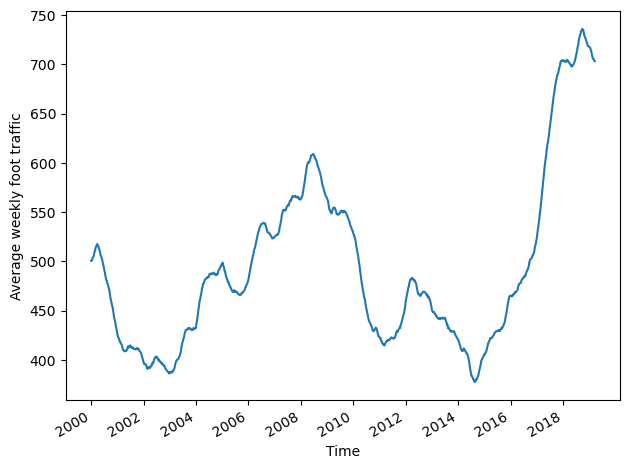

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
 
ax.plot(df['foot_traffic'])
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')
 
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
 
fig.autofmt_xdate()
plt.tight_layout()                                               

In [3]:
from statsmodels.tsa.stattools import adfuller
 
ADF_result = adfuller(df['foot_traffic'])
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')   

ADF Statistic: -1.1758885999240758
p-value: 0.6838808917896185


#### This prints out an ADF statistic of –1.18 along with a p-value of 0.68. Since the ADF statistic is not a large negative number, and it has a p-value greater than 0.05, we cannot reject the null hypothesis and our series is therefore non-stationary.

#### Hence, we must apply a transformation to make it stationary. To remove the effect of the trend and stabilize the mean of the series, we will use differencing.

In [4]:
foot_traffic_diff = np.diff(df['foot_traffic'], n=1) 

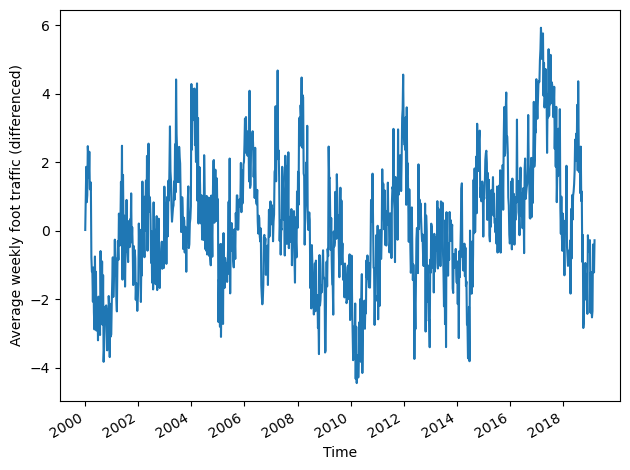

In [5]:
fig, ax = plt.subplots()

ax.plot(foot_traffic_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic (differenced)')

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
ADF_result = adfuller(foot_traffic_diff)
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.268231347422031
p-value: 6.369317654781656e-06


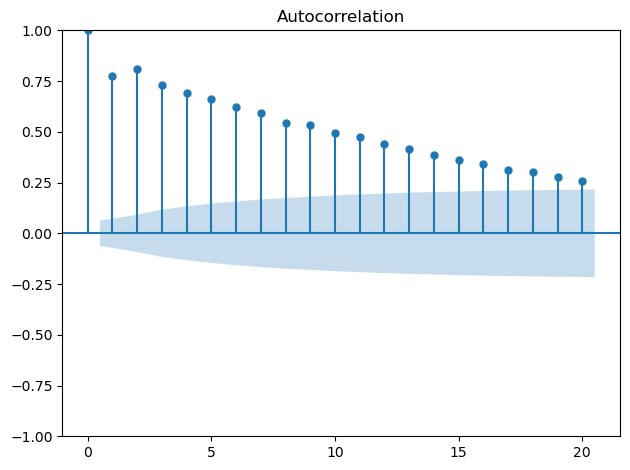

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
 
plot_acf(foot_traffic_diff, lags=20)
 
plt.tight_layout()

#### you’ll notice that we have significant autocorrelation coefficients beyond lag 0. Therefore, we know that our process is not a random walk. Furthermore, you’ll notice that the coefficients are decaying exponentially as the lag increases. Therefore, there is no lag at which the coefficients abruptly become non-significant. This means that we do not have a moving average process and that we are likely studying an autoregressive process.

#### When the ACF plot of a stationary process exhibits a pattern of exponential decay, we probably have an autoregressive process in play, and we must find another way to identify the order p of the AR(p) process. Specifically, we must turn our attention to the partial autocorrelation function(PACF) plot.

## The partial autocorrelation function (PACF)

#### In an attempt to identify the order of a stationary autoregressive process, we used the ACF plot just as we did for a moving average process. Unfortunately, the ACF plot cannot give us this information, and we must turn to the partial autocorrelation function (PACF).

#### Remember that the autocorrelation measures the linear relationship between lagged values of a time series. Consequently, the autocorrelation function measures how the correlation changes between two values as the lag is increased.

#### To understand the partial autocorrelation function, let’s consider the following scenario. Suppose we have the following AR(2) process:

- yt = 0.33yt–1 + 0.50yt–2

#### In more formal terms, the partial autocorrelation measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values in between. Those are known as confounding variables. The partial autocorrelation function will reveal how the partial autocorrelation varies when the lag increases.

## Partial autocorrelation

#### Partial autocorrelation measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values in between. We can plot the partial autocorrelation function to determine the order of a stationary AR(p) process. The coefficients will be non-significant after lag p.


In [8]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
 
np.random.seed(42)
 
ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])
 
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000) 

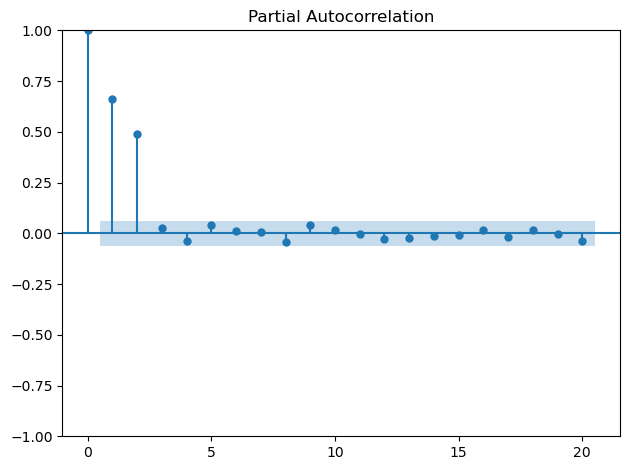

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
 
plot_pacf(AR2_process, lags=20)
 
plt.tight_layout()